In [124]:
from skimage import io as skio
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import platform
import tempfile
import os
from haze_functions import dark_channel, atmosphere_light, transmission
# necessite scikit-image 

ImportError: cannot import name 'dark_channel' from 'haze_functions' (/Users/antoineverier/Documents/GitHub/IMA201_Project/haze_functions.py)

In [121]:
im = skio.imread("haze_image/trees-1587301_1280.jpg")

darkchannel = dark_channel(im,15)

image_gray = np.mean(im, axis=2).astype(np.uint8)

lol = atmosphere_light(im, darkchannel, 0.001)

t = transmission(im, lol, 0.95, 15)


NameError: name 'atmosphere_light' is not defined

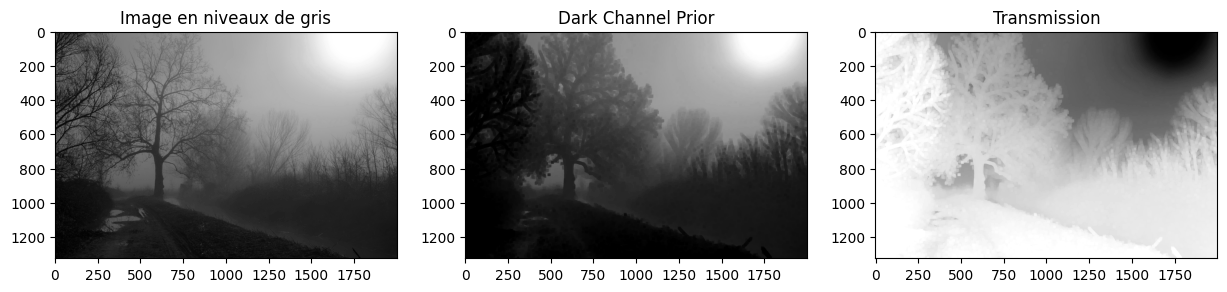

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))

axes[0].imshow(image_gray, cmap='gray', )  # Utilisez 'gray' pour les images en niveaux de gris
axes[0].set_title('Image en niveaux de gris')

axes[1].imshow(darkchannel, cmap='gray')
axes[1].set_title('Dark Channel Prior')

axes[2].imshow(t, cmap='gray')
axes[2].set_title('Transmission')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[255 255 255]
1.0
(1325, 2000, 3)
[[[2.29357798e-01 2.41868224e-01 1.95996664e-01]
  [2.33081169e-01 2.45348599e-01 2.00368023e-01]
  [1.81891673e-01 1.85933711e-01 1.53597413e-01]
  ...
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]]

 [[1.75145955e-01 1.83486239e-01 1.37614679e-01]
  [1.47209160e-01 1.51298303e-01 1.18585156e-01]
  [1.33387227e-01 1.29345190e-01 1.09135004e-01]
  ...
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]]

 [[1.04253545e-01 1.04253545e-01 7.08924103e-02]
  [1.06317726e-01 9.40502965e-02 7.36045798e-02]
  [1.01050930e-01 8.89248181e-02 6.87146322e-02]
  ...
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]
  [5.34782609e+00 5.15217391e+00 4.82608696e+00]]

 ...

 [[3.13725490e-02 1.56862745e-02 3.92156863e-03]
  [3.

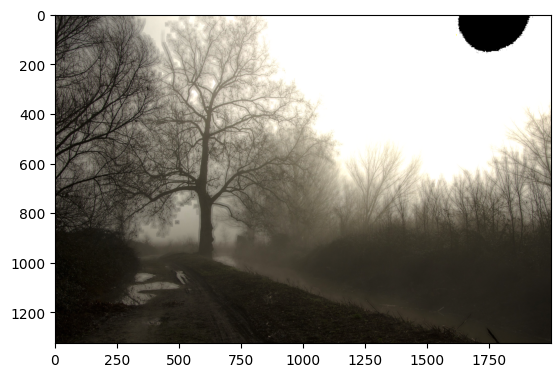

In [117]:
def haze_remove(im, A, t):
    reshaped_t = t[:, :, np.newaxis].repeat(3, axis=2)
    print(A)
    print(np.max(reshaped_t))
    withouthaze = ((im-A)/reshaped_t) + A
    withouthaze = withouthaze-255
    return withouthaze/255

final = haze_remove(im, lol, t)
print(np.shape(final))
print(final)
plt.imshow(final)
plt.show()